In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kag|gle/kaggle.json

/bin/bash: gle/kaggle.json: No such file or directory
chmod: cannot access '/root/.kag': No such file or directory


In [10]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.47G/1.49G [00:06<00:00, 224MB/s]
100% 1.49G/1.49G [00:06<00:00, 262MB/s]


In [4]:
import os
import zipfile

# zipfile 라이브러리의 ZipFile 클래스로 ZIP 파일 열기
data = zipfile.ZipFile('./100-bird-species.zip', 'r')

# 압축 해제
data.extractall()
data.close()

In [80]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

[]


In [11]:
1import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

##**데이터셋 불러오기**

### **폴더 경로 정의**

In [12]:
#기본 경로 설정
birds_dataset = r'./100-bird-species'

# train/validation/test 폴더 경로 설정
train_path = os.path.join(birds_dataset, 'train')
test_path = os.path.join(birds_dataset, 'test')
validation_path = os.path.join(birds_dataset, 'valid')

# 이미지 크기 정의
img_height = 128
img_width = 128

### **파일이름, 데이터 갯수 확인**

In [13]:
train_birds_fnames=os.listdir(train_path)

print(train_birds_fnames[:5])

print('Total train birds images:', len(train_birds_fnames))

print('Total validation cat images:', len(os.listdir(train_path)))

['SCARLET CROWNED FRUIT DOVE', 'EUROPEAN TURTLE DOVE', 'ROCK DOVE', 'HAWAIIAN GOOSE', 'TURKEY VULTURE']
Total train birds images: 400
Total validation cat images: 400


In [15]:
# using tensorflow imagedatagenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the datagens
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# generator from directory

train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width),
                                                    batch_size=32,class_mode='categorical',
                                                    color_mode='rgb',seed = 42,
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(validation_path, target_size=(img_height, img_width),
                                                batch_size=32,class_mode='categorical',
                                                color_mode='rgb',seed = 42,
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width),
                                                  batch_size=32,class_mode='categorical',
                                                  color_mode='rgb',shuffle=True,
                                                  seed = 42)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [16]:
for images_batch, labels_batch in train_generator:
    print(images_batch.shape)
    print(labels_batch.shape)
    
    break

(32, 128, 128, 3)
(32, 400)


### **데이터 이미지 확인**

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

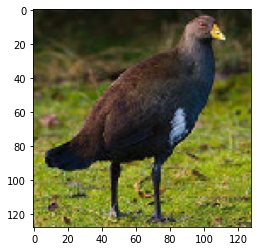

In [17]:
batch=next(train_generator)  
print(batch[0].shape) # batch[0] 이미지, batch[1] 레이블
img=batch[0][0]   
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img) 

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

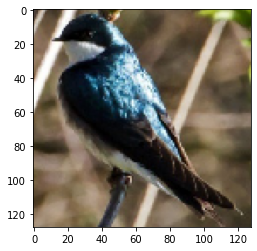

In [26]:
batch=next(test_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img)

In [ ]:
for images_batch, labels_batch in train_generator:
    print(images_batch.shape)
    print(labels_batch.shape)
    
    break

(32, 128, 128, 3)
(32, 400)


### **CNN 모델 적용하기(기본)**

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings(action='ignore')

In [19]:
num_categories = 400 # 클래스 400개 가짐

In [20]:
input_shape = batch[0].shape[1:] 
input_shape

(128, 128, 3)

In [21]:
model = models.Sequential(name='baseline_birds')

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

In [22]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


### **데이터 전처리**

  - imageDataGenerator 클래스의 flow_from_directory() 함수를 이용해 호출 => 제너레이터(generator)생성
  
  - 데이터를 필요한 만큼 메모리로 로드해 모델에 전달
  - flow_from_directory()함수 인자
    *   첫 번째 인자 : 데이터 이미지 경로
    *   target_size : 패치 이미지 크기(폴더에 있는 이미지가 다르더라도 지정한 크기로 자동 조절)
   * batch_size : 배치 크기 지정  => **내가 정의한 input shape 과 일치시켜야 한다**
    * class_mode : 분류 방식에 대한 설정
        * categorical : 2D one-hot 부호화된 라벨이 반환
        * binary : 1D 이진 라벨 반환
        * sparse : 1D 정수 라벨 반환
        * None : 라벨 반환 없음



In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator를 이용해 모든 데이터를 0~1 사이의 값으로 압축
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터와 검증 데이터에 사용할 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    batch_size=32,
                                                    class_mode= 'categorical',
                                                    target_size=(128, 128))  # input_shape와 일치시켜줌

validation_generator = val_datagen.flow_from_directory(validation_path, 
                                                    batch_size=32,
                                                    class_mode= 'categorical',
                                                    target_size=(128, 128)) 

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


### **훈련**

In [ ]:
history = model.fit(train_generator,steps_per_epoch=100,  # 총 학습데이터 / (generator_batch_size)배치사이즈 : 2000/20 = 100
                    epochs=50,
                    validation_data = validation_generator,
                    validation_steps= 50,
                    verbose=1) # 총 검증데이터/(generator_batch_size) : 1000/20 = 50

Epoch 1/50
100/100 [==============================] - 31s 158ms/step - loss: 5.9779 - acc: 0.0041 - val_loss: 5.8674 - val_acc: 0.0094
Epoch 2/50
100/100 [==============================] - 16s 160ms/step - loss: 5.7773 - acc: 0.0147 - val_loss: 5.5516 - val_acc: 0.0231
Epoch 3/50
100/100 [==============================] - 12s 119ms/step - loss: 5.4065 - acc: 0.0350 - val_loss: 5.0364 - val_acc: 0.0656
Epoch 4/50
100/100 [==============================] - 11s 111ms/step - loss: 5.0365 - acc: 0.0613 - val_loss: 4.7949 - val_acc: 0.0894
Epoch 5/50
100/100 [==============================] - 11s 105ms/step - loss: 4.6381 - acc: 0.1034 - val_loss: 4.3912 - val_acc: 0.1169
Epoch 6/50
100/100 [==============================] - 10s 100ms/step - loss: 4.3368 - acc: 0.1366 - val_loss: 4.1339 - val_acc: 0.1606
Epoch 7/50
100/100 [==============================] - 10s 99ms/step - loss: 4.1433 - acc: 0.1725 - val_loss: 3.7859 - val_acc: 0.2087
Epoch 8/50
100/100 [==============================] - 9s

### **모델 아웃라인 확인**

In [ ]:
model.summary()

Model: "baseline_birds"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

정확도(accuracy) 확인

In [ ]:
# 정확도(accuracy) 확인
scores=model.evaluate_generator(validation_generator, steps=5)
print('%s: %.2f%%'%(model.metrics_names[1], scores[1]*100))

acc: 51.25%


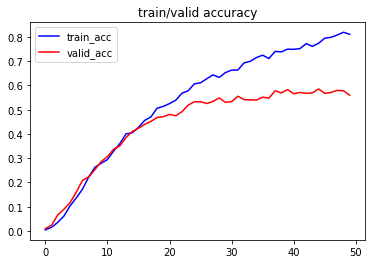

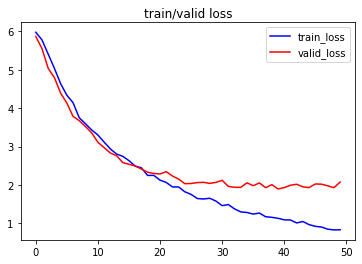

In [ ]:
# import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'b', label='train_acc')
plt.plot(epochs, val_acc, 'r', label='valid_acc')
plt.title('train/valid accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='train_loss')
plt.plot(epochs, val_loss, 'r', label='valid_loss')
plt.title('train/valid loss')
plt.legend()

plt.show()


# 과적합,,



In [ ]:
model.save('model_bird_50.h5')

### **모델2 이미지 데이터 증강 사용**

In [ ]:
# create the datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = False)


# for every file in the train directory

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True, seed = 42)

Found 58388 images belonging to 400 classes.


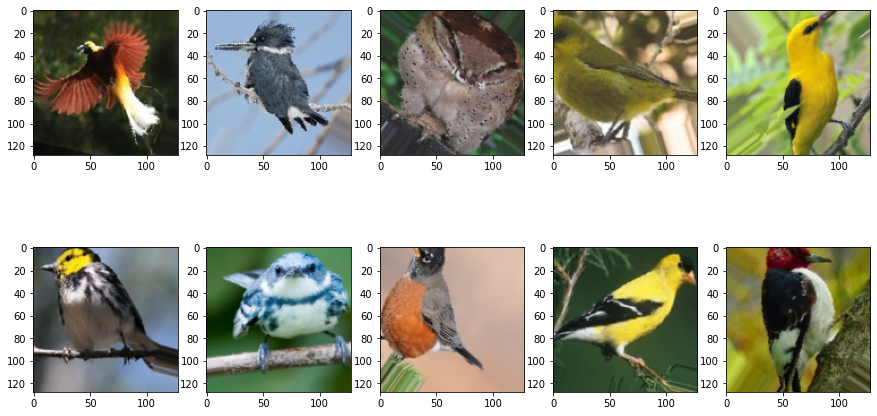

In [ ]:
# let's visualize what just happened

# create the plot
plt.figure(figsize=(15, 8))
for i in range(10):
  # create 10 subplots
  plt.subplot(2, 5, i+1)
  batch = next(train_generator)
  
  # batch[0] represents images, and batch[1] represent labels
  image = batch[0][i]
  plt.imshow(image)

plt.show()

In [ ]:
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = models.Sequential(name='image_augment_birds')

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))


model.add(layers.Flatten())

model.add(layers.Dropout(0.5))   # 과적합방지 기존 모델에서 드롭아웃 추가

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

In [ ]:
model.summary()

Model: "image_augment_birds"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 12

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
100/100 [==============================] - 19s 184ms/step - loss: 5.9939 - acc: 0.0025 - val_loss: 5.9850 - val_acc: 0.0037
Epoch 2/100
100/100 [==============================] - 18s 178ms/step - loss: 5.9683 - acc: 0.0078 - val_loss: 5.9102 - val_acc: 0.0069
Epoch 3/100
100/100 [==============================] - 18s 180ms/step - loss: 5.8083 - acc: 0.0119 - val_loss: 5.6796 - val_acc: 0.0219
Epoch 4/100
100/100 [==============================] - 18s 177ms/step - loss: 5.5215 - acc: 0.0269 - val_loss: 5.2926 - val_acc: 0.0319
Epoch 5/100
100/100 [==============================] - 20s 201ms/step - loss: 5.2470 - acc: 0.0369 - val_loss: 5.0953 - val_acc: 0.0425
Epoch 6/100
100/100 [==============================] - 18s 178ms/step - loss: 5.0584 - acc: 0.0422 - val_loss: 4.7595 - val_acc: 0.0756
Epoch 7/100
100/100 [==============================] - 18s 178ms/step - loss: 4.8890 - acc: 0.0547 - val_loss: 4.6560 - val_acc: 0.0894
Epoch 8/100
100/100 [===========================

In [ ]:
# 정확도(accuracy) 확인
scores=model.evaluate_generator(validation_generator, steps=5)
print('%s: %.2f%%'%(model.metrics_names[1], scores[1]*100))

acc: 56.88%


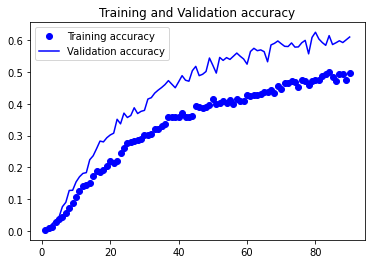

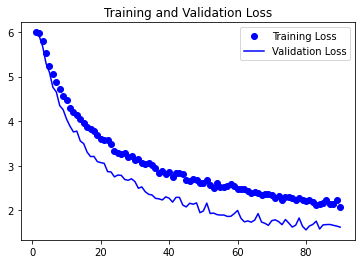

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [46]:
model.save('image_birds.h5')

### **모델평가**

In [49]:
pred = model.predict(test_generator, steps=50)
pred.shape

(1600, 400)

In [52]:
# first, what are the names of the classes of birds

train_path = './100-bird-species/train'
categories = []

for index, category_name in enumerate(sorted(os.listdir(train_path))):
    categories.append(category_name)

len(categories)

400

In [53]:
class_dict = dict(enumerate(categories))
print(class_dict)

{0: 'ABBOTTS BABBLER', 1: 'ABBOTTS BOOBY', 2: 'ABYSSINIAN GROUND HORNBILL', 3: 'AFRICAN CROWNED CRANE', 4: 'AFRICAN EMERALD CUCKOO', 5: 'AFRICAN FIREFINCH', 6: 'AFRICAN OYSTER CATCHER', 7: 'ALBATROSS', 8: 'ALBERTS TOWHEE', 9: 'ALEXANDRINE PARAKEET', 10: 'ALPINE CHOUGH', 11: 'ALTAMIRA YELLOWTHROAT', 12: 'AMERICAN AVOCET', 13: 'AMERICAN BITTERN', 14: 'AMERICAN COOT', 15: 'AMERICAN GOLDFINCH', 16: 'AMERICAN KESTREL', 17: 'AMERICAN PIPIT', 18: 'AMERICAN REDSTART', 19: 'AMETHYST WOODSTAR', 20: 'ANDEAN GOOSE', 21: 'ANDEAN LAPWING', 22: 'ANDEAN SISKIN', 23: 'ANHINGA', 24: 'ANIANIAU', 25: 'ANNAS HUMMINGBIRD', 26: 'ANTBIRD', 27: 'ANTILLEAN EUPHONIA', 28: 'APAPANE', 29: 'APOSTLEBIRD', 30: 'ARARIPE MANAKIN', 31: 'ASHY THRUSHBIRD', 32: 'ASIAN CRESTED IBIS', 33: 'AVADAVAT', 34: 'AZURE JAY', 35: 'AZURE TANAGER', 36: 'AZURE TIT', 37: 'BAIKAL TEAL', 38: 'BALD EAGLE', 39: 'BALD IBIS', 40: 'BALI STARLING', 41: 'BALTIMORE ORIOLE', 42: 'BANANAQUIT', 43: 'BAND TAILED GUAN', 44: 'BANDED BROADBILL', 45: 'BAN

In [54]:
import pickle

with open('birds_dict.pickle', 'wb') as handle:
    pickle.dump(class_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [55]:

images = test_generator[0][0]
images.shape

(32, 128, 128, 3)

In [56]:
# shape of array of one-hotencoded label of first image in first batch
labels = test_generator[0][1]
print(labels[0].shape)
print(labels[0]) # label for the first image

(400,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [57]:
# let's predict for first batch only

pred_proba = model.predict(images, steps=50) 
prediction = np.argmax(pred_proba, axis=1)
prediction = list(prediction)
print(prediction)

predicted_bird_specie = []
for index, val in enumerate(prediction):
    for key, value in class_dict.items():
        if val == key:
            predicted_bird_specie.append(class_dict[key])

print(predicted_bird_specie)

[239, 63, 341, 239, 216, 110, 396, 308, 353, 224, 335, 123, 138, 288, 197, 214, 234, 253, 224, 262, 195, 200, 124, 154, 320, 193, 349, 288, 70, 306, 289, 95]
['JACK SNIPE', 'BLACK SWAN', 'SCARLET IBIS', 'JACK SNIPE', 'HIMALAYAN MONAL', 'CHUKAR PARTRIDGE', 'WOOD DUCK', 'RAINBOW LORIKEET', 'SPOONBILL', 'HOUSE FINCH', 'RUFUOS MOTMOT', 'COMMON POORWILL', 'CRIMSON SUNBIRD', 'OYSTER CATCHER', 'GREATOR SAGE GROUSE', 'HEPATIC TANAGER', 'INDIGO BUNTING', 'LITTLE AUK', 'HOUSE FINCH', 'MANGROVE CUCKOO', 'GREAT KISKADEE', 'GREEN MAGPIE', 'COMMON STARLING', 'EASTERN GOLDEN WEAVER', 'RED TAILED HAWK', 'GREAT GRAY OWL', 'SORA', 'OYSTER CATCHER', 'BLACK-THROATED SPARROW', 'PYGMY KINGFISHER', 'PAINTED BUNTING', 'CAPE ROCK THRUSH']


In [58]:
# let's see the actual bird species
actual_bird_class = np.argmax(labels, axis=1)
actual_bird_class = list(actual_bird_class)
print(actual_bird_class)

actual_bird_specie = []
for index, val in enumerate(prediction):
    for key, value in class_dict.items():
        if val == key:
            actual_bird_specie.append(class_dict[key])

print(actual_bird_specie)

[346, 63, 341, 239, 105, 110, 396, 308, 353, 112, 240, 67, 138, 288, 394, 101, 266, 253, 108, 59, 293, 181, 135, 15, 139, 254, 389, 32, 70, 199, 27, 399]
['JACK SNIPE', 'BLACK SWAN', 'SCARLET IBIS', 'JACK SNIPE', 'HIMALAYAN MONAL', 'CHUKAR PARTRIDGE', 'WOOD DUCK', 'RAINBOW LORIKEET', 'SPOONBILL', 'HOUSE FINCH', 'RUFUOS MOTMOT', 'COMMON POORWILL', 'CRIMSON SUNBIRD', 'OYSTER CATCHER', 'GREATOR SAGE GROUSE', 'HEPATIC TANAGER', 'INDIGO BUNTING', 'LITTLE AUK', 'HOUSE FINCH', 'MANGROVE CUCKOO', 'GREAT KISKADEE', 'GREEN MAGPIE', 'COMMON STARLING', 'EASTERN GOLDEN WEAVER', 'RED TAILED HAWK', 'GREAT GRAY OWL', 'SORA', 'OYSTER CATCHER', 'BLACK-THROATED SPARROW', 'PYGMY KINGFISHER', 'PAINTED BUNTING', 'CAPE ROCK THRUSH']


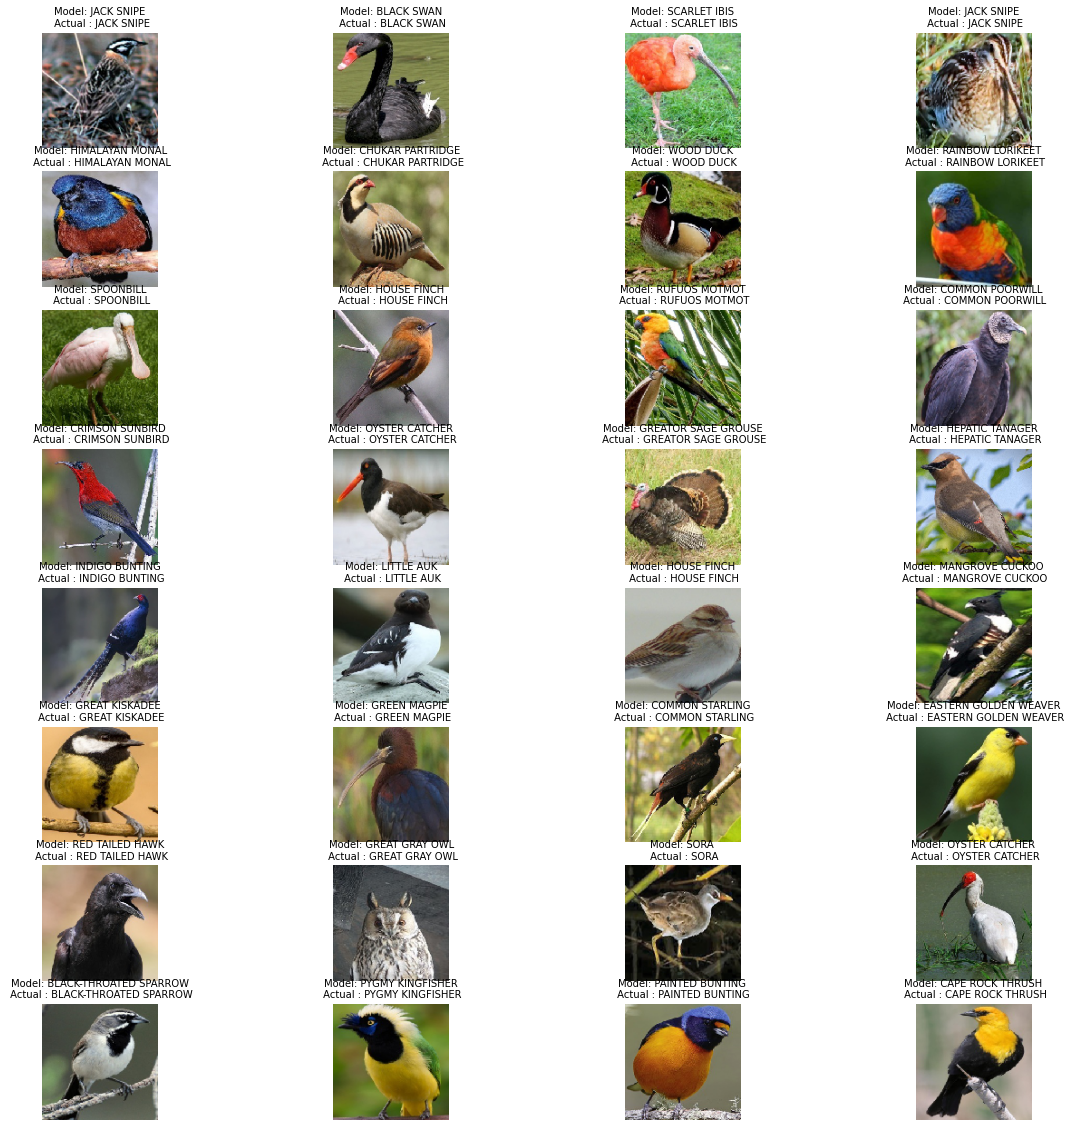

In [59]:
# now let's visualize:

# create the plot
plt.figure(figsize=(20, 20))

for i in range(len(images)):
  # create 32 subplots
  plt.subplot(8, 4, i + 1)

  # add each image to subplot and plot it
  image = images[i]
  plt.imshow(image)

  # add the predicted and actual specie name
  plt.title(f'Model: {predicted_bird_specie[i]}\n Actual : {actual_bird_specie[i]}',
            fontsize=10)
  plt.axis('off')
  
plt.show() 


#56.88 %

이미지 평가

In [60]:
def evaluate(image_path, model_path, dict_path, image_height=128, image_width=128, n_channels=3):
   
    # import dependencies
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # suppress tensorflow warnings
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    from tensorflow import keras
    from keras import models
    import pickle
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    # 모델 불러오기
    model = models.load_model(model_path)
    
    with open('birds_dict.pickle', 'rb') as handle:
        class_dict = pickle.load(handle)
    
    # 이미지 불러오기
    image = load_img(image_path, target_size=(image_height, image_width))

    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # 이미지를 배열로 변환하고 0-1 범위로 자르기
    image = img_to_array(image)
    image = np.array(image)
    image = image[:]/255
    image = np.expand_dims(image, axis=0)

    # 이미지 나열
    pred = model.predict(image)
    pred = np.argmax(pred, axis=1)
    
    for key, value in class_dict.items():
        if pred == key:
            predicted_bird_specie = class_dict[key]
            print(f"Model Predicted: {predicted_bird_specie}")
    plt.title(predicted_bird_specie)
    plt.show()

In [61]:
model_path = './image_birds.h5'
dict_path = './birds_dict.pickle'

Model Predicted: AVADAVAT


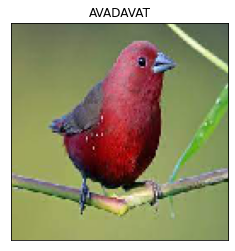

In [63]:
image_path = '/content/bird1.jpeg'
evaluate(image_path, model_path, dict_path)

Model Predicted: RUDY KINGFISHER


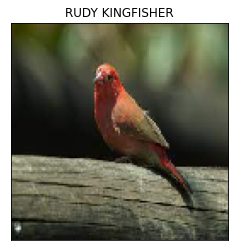

In [64]:
image_path = '/content/bird2.jpeg'
evaluate(image_path, model_path, dict_path)

Model Predicted: WOOD DUCK


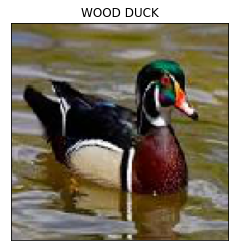

In [65]:
image_path = '/content/bird3.jpeg'
evaluate(image_path, model_path, dict_path)

Model Predicted: KIWI


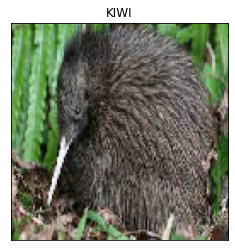

In [66]:
image_path = '/content/bird5.jpeg'
evaluate(image_path, model_path, dict_path)

Model Predicted: WOOD DUCK


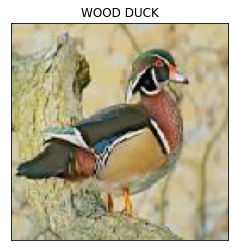

In [67]:
image_path = '/content/bird4.jpeg'
evaluate(image_path, model_path, dict_path)

Model Predicted: HEPATIC TANAGER


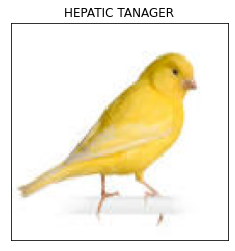

In [68]:
image_path = '/content/bird6.jpeg'
evaluate(image_path, model_path, dict_path)

Model Predicted: TAILORBIRD


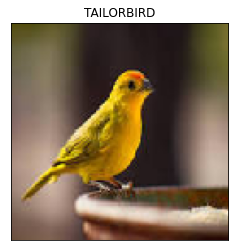

In [70]:
image_path = '/content/bird7.jpeg'
evaluate(image_path, model_path, dict_path)

### **모델 3번째 vgg16**



In [26]:
# let's load the VGG16 model trained on the imagenet dataset
from tensorflow.keras.applications import VGG16

# include top is false so as not to include the Dense classifiers of ImageNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [27]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [33]:
model = models.Sequential(name='birds_pretrained_vgg16')
model.add(conv_base) # add the pretrained network

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(num_categories, activation='softmax'))

In [34]:
model.summary()

Model: "birds_pretrained_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 400)    

In [28]:
# load the VGG16 model again

#include_top is False so it doesn't include the Dense classifer of the Imagenet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

In [29]:
# let's freeze up to the last 3 layers. This means the first layers in the conv_base would be stopped from training

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        conv_base.trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [30]:
# now let's see the number of trainable parameters
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [31]:
model = models.Sequential(name='birds_pretrained_vgg16')
model.add(conv_base) # add the pretrained network
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(num_categories, activation='softmax'))

In [32]:
# we must set a very small learning rate so as not to destroy the weights learned by the Vgg16 model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(1e-5)


In [33]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_finetuned.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [34]:
# since the train_generator in memory refers to the image data augmented one, let's define it again

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width),
                                                    batch_size=32,class_mode='categorical',
                                                    color_mode='rgb',seed = 42,
                                                    shuffle=True)

Found 58388 images belonging to 400 classes.


In [37]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=200, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/50
200/200 [==============================] - 32s 158ms/step - loss: 6.0283 - acc: 0.0020 - val_loss: 5.9931 - val_acc: 0.0037
Epoch 2/50
200/200 [==============================] - 33s 163ms/step - loss: 6.0047 - acc: 0.0027 - val_loss: 5.9906 - val_acc: 0.0037
Epoch 3/50
200/200 [==============================] - 32s 162ms/step - loss: 5.9933 - acc: 0.0030 - val_loss: 5.9854 - val_acc: 0.0031
Epoch 4/50
200/200 [==============================] - 32s 158ms/step - loss: 5.9875 - acc: 0.0042 - val_loss: 5.9858 - val_acc: 0.0037
Epoch 5/50
200/200 [==============================] - 35s 175ms/step - loss: 5.9855 - acc: 0.0023 - val_loss: 5.9832 - val_acc: 0.0056
Epoch 6/50
200/200 [==============================] - 32s 161ms/step - loss: 5.9858 - acc: 0.0027 - val_loss: 5.9811 - val_acc: 0.0025
Epoch 7/50
200/200 [==============================] - 33s 164ms/step - loss: 5.9806 - acc: 0.0039 - val_loss: 5.9744 - val_acc: 0.0063
Epoch 8/50
200/200 [==============================] - 3

In [39]:
model.save('birds_final_model.h5')

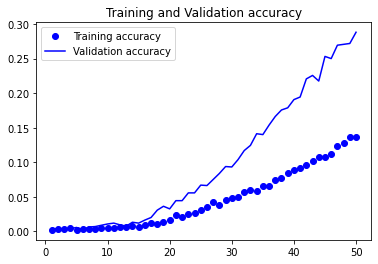

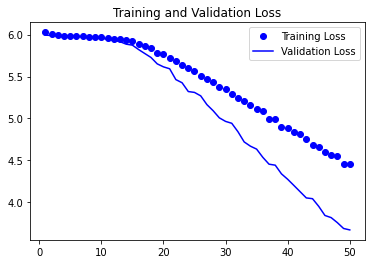

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [41]:


test_loss, test_acc = model.evaluate(test_generator, steps=50)
image_path = '/content/bird5.jpeg'
evaluate(image_path, model_path, dict_path)print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 4s 78ms/step - loss: 3.6149 - acc: 0.3088
test acc:  30.88 %


Model Predicted: KIWI


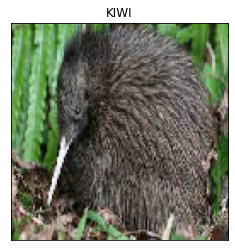

In [79]:
model_path1 = './birds_final_model.h5'
dict_path1 = './birds_dict.pickle'


image_path1 = '/content/bird5.jpeg'
evaluate(image_path1, model_path1, dict_path1)

모델 4


In [ ]:
# let's load the VGG16 model trained on the imagenet dataset
from tensorflow.keras.applications import VGG16

# include top is false so as not to include the Dense classifiers of ImageNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [71]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [72]:
model = models.Sequential()
model.add(conv_base) # add the pretrained network
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_categories, activation='softmax'))

In [73]:
# when learning to to classify into our categories, we need to ensure that the conv_base doesn't train, so we freeze it

conv_base.trainable = False

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               2

In [75]:
# our augmentation code again
# remember not to augment validation set

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = False)


# for every file in the directory
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True, seed = 42)
                                              
  

Found 58388 images belonging to 400 classes.


In [76]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birdsfeature_extract.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [78]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])


Epoch 1/50
100/100 [==============================] - 19s 189ms/step - loss: 5.9670 - acc: 0.0053 - val_loss: 5.9617 - val_acc: 0.0056
Epoch 2/50
100/100 [==============================] - 19s 191ms/step - loss: 5.9692 - acc: 0.0041 - val_loss: 5.9233 - val_acc: 0.0075
Epoch 3/50
100/100 [==============================] - 19s 187ms/step - loss: 5.9766 - acc: 0.0069 - val_loss: 5.9271 - val_acc: 0.0031
Epoch 4/50
100/100 [==============================] - 19s 186ms/step - loss: 5.9899 - acc: 0.0047 - val_loss: 5.9445 - val_acc: 0.0044
Epoch 5/50
100/100 [==============================] - 20s 200ms/step - loss: 5.9510 - acc: 0.0044 - val_loss: 5.9194 - val_acc: 0.0069
Epoch 6/50
100/100 [==============================] - 19s 186ms/step - loss: 5.9495 - acc: 0.0063 - val_loss: 5.9271 - val_acc: 0.0044
Epoch 7/50
100/100 [==============================] - 19s 189ms/step - loss: 5.9327 - acc: 0.0050 - val_loss: 5.8683 - val_acc: 0.0050
Epoch 8/50
100/100 [==============================] - 1